# Vehicle Detection

*Much code adapted from Udacity's Vehicle Detection and Tracking Lesson*

In [1]:
import numpy as np
import cv2
import glob
import time

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from skimage.feature import hog

from scipy.ndimage.measurements import label

from helperfunctions import *

### 1. Perform a Histogram of Oriented Gradients (HOG) feature extraction on a labeled training set of images and train a classifier (e.g. a Linear SVM classifier)


#### 1.1 Set up helper functions for extracting HOG and colour features

#### 1.2 Prepare data for classifier (extract features)

In [2]:
# Read in cars and notcars
cars = glob.glob('vehicles/*/*.png')
notcars = glob.glob('non-vehicles/*/*.png')


# TODO: Remove
# Reduce the sample size because
# The quiz evaluator times out after 13s of CPU time
sample_size = 500
cars = cars[0:sample_size]
notcars = notcars[0:sample_size]

# Check that arrays are not empty
print(cars[0])
print(notcars[0])

vehicles/GTI_Far/image0000.png
non-vehicles/Extras/extra1.png


[array([  2.06862748e-01,   3.03921580e-01,   3.02941203e-01, ...,
          2.73485654e-04,   1.72523913e-04,   0.00000000e+00])]

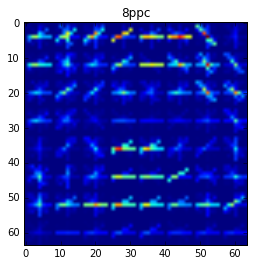

In [75]:
### TODO: Tweak these parameters and see how the results change.
color_space = 'RGB' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 8  # HOG orientations
pix_per_cell = 8 # HOG pixels per cell
cell_per_block = 4 # HOG cells per block
hog_channel = "ALL" # Can be 0, 1, 2, or "ALL"
spatial_size = (16, 16) # Spatial binning dimensions
hist_bins = 24    # Number of histogram bins
spatial_feat = True # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off
y_start_stop = [400, 720] # Min and max in y to search in slide_window()
image_file_name = "hogviz/" + str(color_space) + "_ss" + str(spatial_size[0]) + str(spatial_size[1]) + "_hb" + str(hist_bins) + "_TTT_" + "o" + str(orient) \
                    + "_ppc" + str(pix_per_cell) + "_cpb" \
                    + str(cell_per_block) + "_hc" + str(hog_channel)
image_title = str(pix_per_cell) + "ppc"
logfilepath = "logs/hogviz_experiments/ppc_exp1.md"

sample_car = [cars[42]]
sample_notcar = [notcars[42]]

extract_features(sample_car, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat,
                        viz=True, viz_only=True, viz_title=image_title, hog_viz_name=image_file_name)

In [78]:
# Extract features
car_features = extract_features(cars, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)
notcar_features = extract_features(notcars, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)

X = np.vstack((car_features, notcar_features)).astype(np.float64)                        
# Fit a per-column scaler
X_scaler = StandardScaler().fit(X)
# Apply the scaler to X
scaled_X = X_scaler.transform(X)

# Define the labels vector
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))


# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, y, test_size=0.2, random_state=rand_state)

print('Using:',orient,'orientations',pix_per_cell,
    'pixels per cell and', cell_per_block,'cells per block')
print('Feature vector length:', len(X_train[0]))

Using: 8 orientations 8 pixels per cell and 4 cells per block
Feature vector length: 10440


### Optionally, you can also apply a color transform and append binned color features, as well as histograms of color, to your HOG feature vector. 
* Note: for those first two steps don't forget to normalize your features and randomize a selection for training and testing.

#### 1.3 Train classifier

In [79]:
# Use a linear SVC 
svc = LinearSVC()
# Check the training time for the SVC
t=time.time()
svc.fit(X_train, y_train)
t2 = time.time()
training_time = round(t2-t, 4)
print(training_time, 'Seconds to train SVC...')
# Check the score of the SVC
svc_score = round(svc.score(X_test, y_test), 8)
print('Test Accuracy of SVC = ', svc_score)
# Check the prediction time for a single sample
t=time.time()

# Log training parameters and results

with open(logfilepath, "a") as f:
    f.write("\n\n" + str(image_file_name))
    f.write("\nParameters:")
    f.write("\ncolor_space: " + str(color_space))
    f.write("\norient: " + str(orient))
    f.write("\npix_per_cell: " + str(pix_per_cell))
    f.write("\ncell_per_block: " + str(cell_per_block))
    f.write("\nhog_channel: " + str(hog_channel))
    f.write("\nspatial_size: " + str(spatial_size))
    f.write("\nhist_bins: " + str(hist_bins))
    f.write("\nspatial_feat: " + str(spatial_feat))
    f.write("\nhist_feat: " + str(hist_feat))
    f.write("\nhog_feat: " + str(hog_feat))
    f.write('\nFeature vector length:' + str(len(X_train[0])))
    f.write("\n" + str(training_time) + 'Seconds to train SVC...')
    f.write('\nTest Accuracy of SVC = ' + str(svc_score))

print("\nParameters:")
print("color_space: ", color_space)
print("orient: ", orient)
print("pix_per_cell: ", pix_per_cell)
print("cell_per_block: ", cell_per_block)
print("hog_channel: ", hog_channel)
print("spatial_size: ", spatial_size)
print("hist_bins: ", hist_bins)
print("spatial_feat: ", spatial_feat)
print("hist_feat: ", hist_feat)
print("hog_feat: ", hog_feat)

0.4175 Seconds to train SVC...
Test Accuracy of SVC =  0.985

Parameters:
color_space:  RGB
orient:  8
pix_per_cell:  8
cell_per_block:  4
hog_channel:  ALL
spatial_size:  (16, 16)
hist_bins:  24
spatial_feat:  True
hist_feat:  True
hog_feat:  True


### 2. Implement a sliding-window technique and use your trained classifier to search for vehicles in images.

y bounds for region we search using the sliding window technique:  [400, 720]
Hot windows:  [((824, 432), (888, 496)), ((856, 432), (920, 496)), ((888, 432), (952, 496)), ((1080, 432), (1144, 496)), ((1208, 432), (1272, 496))]


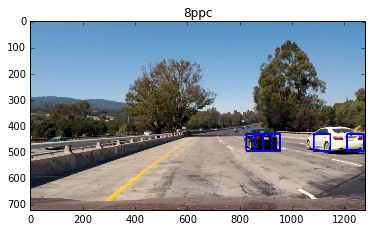

In [80]:
print("y bounds for region we search using the sliding window technique: ", 
      y_start_stop)

# Read in image
image = mpimg.imread('test_images/test1.jpg')
draw_image = np.copy(image)

# Rescale data since training data extracted from 
# .png images (scaled 0 to 1 by mpimg) and image we
# are searching is .jpg (scaled 0 to 255)
image = image.astype(np.float32)/255

# Get list of windows to search at this stage.
windows = slide_window(image, x_start_stop=[600, 1280], y_start_stop=y_start_stop, 
                    xy_window=(64, 64), xy_overlap=(0.5, 0.5))

# Return all the windows the classifier has predicted contain car(s) ('positive windows').
hot_windows = search_windows(image, windows, svc, X_scaler, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)                       

# Draw bounding boxes around the windows that the classifier predicted has cars in them
window_img = draw_boxes(draw_image, hot_windows, color=(0, 0, 255), thick=6)                    

# Print the coordinates of the corners of the positive windows.
print("Hot windows: ", hot_windows)

# Plot image with bounding boxes drawn.
plt.title(image_title)
plt.imshow(window_img)
plt.savefig(image_file_name + "_window")

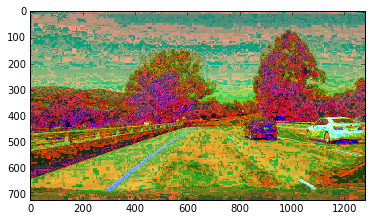

In [43]:
# Can be RGB, HSV, LUV, HLS, YUV, YCrCb

plt.imshow(cv2.cvtColor(image, cv2.COLOR_RGB2HLS))

### 4. Run your pipeline on a video stream and create a heat map of recurring detections frame by frame to reject outliers and follow detected vehicles.

In [7]:
def add_bboxes(input_image, windows, classifier, scaler, draw=True, bboxes_only=False):
    """Adds bounding boxes from `input_image` (one array of arrays) to
    the global variable `bboxes_list`'.
    If `draw` is True, returns image overlaid with bounding boxes.
    """
    global bboxes_list
    hot_windows = search_windows(input_image, windows, classifier, scaler, color_space=color_space,
                        spatial_size=spatial_size, hist_bins=hist_bins,
                        orient=orient, pix_per_cell=pix_per_cell,
                        cell_per_block=cell_per_block,
                        hog_channel=hog_channel, spatial_feat=spatial_feat,
                        hist_feat=hist_feat, hog_feat=hog_feat)
    print("Hot windows: ", hot_windows)
    bboxes_list.append(hot_windows)
    if draw == True:
        draw_image = np.copy(input_image)
        window_img = draw_boxes(input_image, hot_windows, color=(0, 0, 255), thick=6)
        return window_img

In [8]:
def add_bboxes_to_list(image):
    """Adds bounding boxes in `image` to global `bboxes_list`.
    Returns image with bounding boxes drawn.
    """
    return add_bboxes(image, windows, svc, X_scaler)

In [22]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML

bboxes_list = []

video = VideoFileClip("project_video.mp4").subclip(30,35)
video_output = "step1_39_41.mp4"
project_clip = video.fl_image(add_bboxes_to_list) #NOTE: this function expects color images!!
%time project_clip.write_videofile(video_output, audio=False)

print("Bounding boxes: ", bboxes_list)

Hot windows:  [((960, 400), (1056, 496)), ((1104, 448), (1200, 544)), ((1152, 448), (1248, 544))]
[MoviePy] >>>> Building video step1_39_41.mp4
[MoviePy] Writing video step1_39_41.mp4


  1%|          | 1/126 [00:00<00:34,  3.66it/s]

Hot windows:  [((960, 400), (1056, 496)), ((1104, 448), (1200, 544)), ((1152, 448), (1248, 544))]


  2%|▏         | 2/126 [00:00<00:32,  3.85it/s]

Hot windows:  [((960, 400), (1056, 496)), ((1104, 448), (1200, 544)), ((1152, 448), (1248, 544))]


  2%|▏         | 3/126 [00:00<00:30,  3.97it/s]

Hot windows:  [((960, 400), (1056, 496)), ((1104, 448), (1200, 544)), ((1152, 448), (1248, 544))]


  3%|▎         | 4/126 [00:00<00:29,  4.12it/s]

Hot windows:  [((960, 400), (1056, 496)), ((1104, 448), (1200, 544)), ((1152, 448), (1248, 544))]


  4%|▍         | 5/126 [00:01<00:28,  4.27it/s]

Hot windows:  [((960, 400), (1056, 496)), ((1104, 448), (1200, 544)), ((1152, 448), (1248, 544))]


  5%|▍         | 6/126 [00:01<00:27,  4.36it/s]

Hot windows:  [((1104, 448), (1200, 544)), ((1152, 448), (1248, 544))]


  6%|▌         | 7/126 [00:01<00:26,  4.44it/s]

Hot windows:  [((1152, 448), (1248, 544))]


  6%|▋         | 8/126 [00:01<00:26,  4.54it/s]

Hot windows:  [((1152, 448), (1248, 544))]


  7%|▋         | 9/126 [00:02<00:25,  4.56it/s]

Hot windows:  [((1152, 448), (1248, 544))]


  8%|▊         | 10/126 [00:02<00:25,  4.61it/s]

Hot windows:  [((1152, 448), (1248, 544))]


  9%|▊         | 11/126 [00:02<00:25,  4.49it/s]

Hot windows:  []


 10%|▉         | 12/126 [00:02<00:25,  4.43it/s]

Hot windows:  [((1056, 448), (1152, 544))]


 10%|█         | 13/126 [00:02<00:25,  4.49it/s]

Hot windows:  [((1056, 448), (1152, 544))]


 11%|█         | 14/126 [00:03<00:25,  4.41it/s]

Hot windows:  [((1056, 448), (1152, 544))]


 12%|█▏        | 15/126 [00:03<00:24,  4.52it/s]

Hot windows:  [((1056, 448), (1152, 544))]


 13%|█▎        | 16/126 [00:03<00:23,  4.60it/s]

Hot windows:  [((1008, 448), (1104, 544)), ((1056, 448), (1152, 544)), ((1104, 448), (1200, 544))]


 13%|█▎        | 17/126 [00:03<00:23,  4.65it/s]

Hot windows:  [((1008, 448), (1104, 544)), ((1056, 448), (1152, 544))]
Hot windows:  [((1008, 448), (1104, 544)), ((1056, 448), (1152, 544)), ((1104, 448), (1200, 544))]


 16%|█▌        | 20/126 [00:04<00:21,  4.88it/s]

Hot windows:  [((1008, 448), (1104, 544)), ((1056, 448), (1152, 544)), ((1104, 448), (1200, 544))]
Hot windows:  [((1008, 448), (1104, 544)), ((1056, 448), (1152, 544)), ((1104, 448), (1200, 544))]


 17%|█▋        | 21/126 [00:04<00:21,  4.94it/s]

Hot windows:  [((1008, 448), (1104, 544)), ((1056, 448), (1152, 544)), ((1104, 448), (1200, 544))]


 17%|█▋        | 22/126 [00:04<00:21,  4.80it/s]

Hot windows:  [((1056, 448), (1152, 544)), ((1104, 448), (1200, 544))]


 18%|█▊        | 23/126 [00:05<00:22,  4.58it/s]

Hot windows:  [((1056, 448), (1152, 544)), ((1104, 448), (1200, 544))]


 19%|█▉        | 24/126 [00:05<00:22,  4.58it/s]

Hot windows:  [((960, 400), (1056, 496)), ((1056, 448), (1152, 544)), ((1104, 448), (1200, 544))]


 20%|█▉        | 25/126 [00:05<00:22,  4.47it/s]

Hot windows:  [((960, 400), (1056, 496)), ((1104, 448), (1200, 544))]


 21%|██        | 26/126 [00:05<00:23,  4.31it/s]

Hot windows:  [((960, 400), (1056, 496)), ((1104, 448), (1200, 544))]


 21%|██▏       | 27/126 [00:05<00:23,  4.30it/s]

Hot windows:  []


 22%|██▏       | 28/126 [00:06<00:22,  4.28it/s]

Hot windows:  []


 23%|██▎       | 29/126 [00:06<00:22,  4.38it/s]

Hot windows:  []


 24%|██▍       | 30/126 [00:06<00:21,  4.49it/s]

Hot windows:  [((1008, 448), (1104, 544))]


 25%|██▍       | 31/126 [00:06<00:21,  4.47it/s]

Hot windows:  [((1008, 448), (1104, 544))]


 25%|██▌       | 32/126 [00:07<00:20,  4.56it/s]

Hot windows:  []


 26%|██▌       | 33/126 [00:07<00:20,  4.65it/s]

Hot windows:  [((1008, 448), (1104, 544))]


 27%|██▋       | 34/126 [00:07<00:19,  4.69it/s]

Hot windows:  [((1008, 448), (1104, 544))]


 28%|██▊       | 35/126 [00:07<00:19,  4.70it/s]

Hot windows:  [((1008, 448), (1104, 544))]


 29%|██▊       | 36/126 [00:07<00:20,  4.31it/s]

Hot windows:  []


 29%|██▉       | 37/126 [00:08<00:19,  4.46it/s]

Hot windows:  []


 30%|███       | 38/126 [00:08<00:19,  4.55it/s]

Hot windows:  []


 31%|███       | 39/126 [00:08<00:19,  4.54it/s]

Hot windows:  [((1056, 448), (1152, 544))]


 32%|███▏      | 40/126 [00:08<00:18,  4.53it/s]

Hot windows:  [((1056, 448), (1152, 544))]


 33%|███▎      | 41/126 [00:09<00:18,  4.57it/s]

Hot windows:  []


 33%|███▎      | 42/126 [00:09<00:18,  4.63it/s]

Hot windows:  []


 34%|███▍      | 43/126 [00:09<00:17,  4.68it/s]

Hot windows:  []


 35%|███▍      | 44/126 [00:09<00:17,  4.72it/s]

Hot windows:  [((912, 400), (1008, 496))]


 36%|███▌      | 45/126 [00:09<00:17,  4.73it/s]

Hot windows:  [((912, 400), (1008, 496))]


 37%|███▋      | 46/126 [00:10<00:16,  4.74it/s]

Hot windows:  [((912, 400), (1008, 496))]


 37%|███▋      | 47/126 [00:10<00:16,  4.74it/s]

Hot windows:  [((912, 400), (1008, 496)), ((960, 448), (1056, 544))]


 38%|███▊      | 48/126 [00:10<00:16,  4.76it/s]

Hot windows:  [((912, 400), (1008, 496)), ((960, 448), (1056, 544))]


 39%|███▉      | 49/126 [00:10<00:16,  4.73it/s]

Hot windows:  [((1008, 400), (1104, 496))]


 40%|███▉      | 50/126 [00:10<00:16,  4.70it/s]

Hot windows:  [((1008, 400), (1104, 496))]


 41%|████▏     | 52/126 [00:11<00:15,  4.86it/s]

Hot windows:  []
Hot windows:  [((1008, 400), (1104, 496))]


 42%|████▏     | 53/126 [00:11<00:14,  4.91it/s]

Hot windows:  []


 43%|████▎     | 54/126 [00:11<00:14,  4.82it/s]

Hot windows:  []


 44%|████▎     | 55/126 [00:11<00:14,  4.75it/s]

Hot windows:  []


 44%|████▍     | 56/126 [00:12<00:14,  4.79it/s]

Hot windows:  []


 45%|████▌     | 57/126 [00:12<00:14,  4.81it/s]

Hot windows:  []


 46%|████▌     | 58/126 [00:12<00:14,  4.84it/s]

Hot windows:  []
Hot windows:  []


 48%|████▊     | 60/126 [00:13<00:13,  4.75it/s]

Hot windows:  []


 48%|████▊     | 61/126 [00:13<00:13,  4.77it/s]

Hot windows:  []


 49%|████▉     | 62/126 [00:13<00:13,  4.75it/s]

Hot windows:  []


 50%|█████     | 63/126 [00:13<00:13,  4.72it/s]

Hot windows:  []


 51%|█████     | 64/126 [00:13<00:13,  4.71it/s]

Hot windows:  []


 52%|█████▏    | 66/126 [00:14<00:12,  4.82it/s]

Hot windows:  []
Hot windows:  []


 53%|█████▎    | 67/126 [00:14<00:12,  4.87it/s]

Hot windows:  []


 54%|█████▍    | 68/126 [00:14<00:11,  4.86it/s]

Hot windows:  []
Hot windows:  []


 56%|█████▌    | 70/126 [00:15<00:11,  4.80it/s]

Hot windows:  []
Hot windows:  [((960, 400), (1056, 496))]


 57%|█████▋    | 72/126 [00:15<00:11,  4.73it/s]

Hot windows:  [((960, 400), (1056, 496))]


 58%|█████▊    | 73/126 [00:15<00:11,  4.80it/s]

Hot windows:  [((960, 400), (1056, 496))]


 59%|█████▊    | 74/126 [00:15<00:11,  4.65it/s]

Hot windows:  [((960, 400), (1056, 496))]


 60%|█████▉    | 75/126 [00:16<00:11,  4.63it/s]

Hot windows:  [((960, 400), (1056, 496))]
Hot windows:  [((960, 400), (1056, 496))]


 61%|██████    | 77/126 [00:16<00:10,  4.83it/s]

Hot windows:  [((960, 400), (1056, 496))]


 62%|██████▏   | 78/126 [00:16<00:09,  4.84it/s]

Hot windows:  [((960, 400), (1056, 496))]


 63%|██████▎   | 79/126 [00:17<00:09,  4.84it/s]

Hot windows:  [((960, 400), (1056, 496))]


 63%|██████▎   | 80/126 [00:17<00:09,  4.73it/s]

Hot windows:  [((912, 400), (1008, 496))]


 64%|██████▍   | 81/126 [00:17<00:09,  4.68it/s]

Hot windows:  [((912, 400), (1008, 496))]


 65%|██████▌   | 82/126 [00:17<00:09,  4.56it/s]

Hot windows:  [((912, 400), (1008, 496))]


 66%|██████▌   | 83/126 [00:17<00:09,  4.55it/s]

Hot windows:  [((912, 400), (1008, 496))]


 67%|██████▋   | 84/126 [00:18<00:09,  4.54it/s]

Hot windows:  [((912, 400), (1008, 496))]


 67%|██████▋   | 85/126 [00:18<00:09,  4.55it/s]

Hot windows:  [((912, 400), (1008, 496))]


 68%|██████▊   | 86/126 [00:18<00:08,  4.52it/s]

Hot windows:  [((912, 400), (1008, 496))]


 69%|██████▉   | 87/126 [00:18<00:08,  4.60it/s]

Hot windows:  []


 70%|██████▉   | 88/126 [00:18<00:08,  4.68it/s]

Hot windows:  []


 71%|███████   | 89/126 [00:19<00:07,  4.67it/s]

Hot windows:  []


 71%|███████▏  | 90/126 [00:19<00:07,  4.57it/s]

Hot windows:  []


 72%|███████▏  | 91/126 [00:19<00:07,  4.54it/s]

Hot windows:  []


 73%|███████▎  | 92/126 [00:19<00:07,  4.56it/s]

Hot windows:  []


 74%|███████▍  | 93/126 [00:20<00:07,  4.42it/s]

Hot windows:  []


 75%|███████▍  | 94/126 [00:20<00:07,  4.48it/s]

Hot windows:  []


 75%|███████▌  | 95/126 [00:20<00:06,  4.51it/s]

Hot windows:  []


 76%|███████▌  | 96/126 [00:20<00:06,  4.54it/s]

Hot windows:  []


 77%|███████▋  | 97/126 [00:20<00:06,  4.57it/s]

Hot windows:  []


 78%|███████▊  | 98/126 [00:21<00:06,  4.64it/s]

Hot windows:  [((912, 400), (1008, 496))]
Hot windows:  [((912, 400), (1008, 496))]


 80%|████████  | 101/126 [00:21<00:04,  5.04it/s]

Hot windows:  [((912, 400), (1008, 496))]
Hot windows:  [((912, 400), (1008, 496))]


 81%|████████  | 102/126 [00:21<00:04,  4.95it/s]

Hot windows:  [((912, 400), (1008, 496))]


 82%|████████▏ | 103/126 [00:22<00:04,  4.62it/s]

Hot windows:  [((912, 400), (1008, 496))]


 83%|████████▎ | 104/126 [00:22<00:04,  4.53it/s]

Hot windows:  [((912, 400), (1008, 496))]


 83%|████████▎ | 105/126 [00:22<00:04,  4.57it/s]

Hot windows:  [((912, 400), (1008, 496))]


 84%|████████▍ | 106/126 [00:22<00:04,  4.53it/s]

Hot windows:  [((912, 400), (1008, 496))]
Hot windows:  [((912, 400), (1008, 496))]


 86%|████████▌ | 108/126 [00:23<00:03,  4.75it/s]

Hot windows:  [((912, 400), (1008, 496))]


 87%|████████▋ | 109/126 [00:23<00:03,  4.79it/s]

Hot windows:  [((912, 400), (1008, 496))]
Hot windows:  [((864, 400), (960, 496))]


 88%|████████▊ | 111/126 [00:23<00:03,  4.81it/s]

Hot windows:  [((864, 400), (960, 496))]
Hot windows:  [((864, 400), (960, 496))]


 90%|█████████ | 114/126 [00:24<00:02,  4.96it/s]

Hot windows:  [((864, 400), (960, 496))]
Hot windows:  [((864, 400), (960, 496))]


 91%|█████████▏| 115/126 [00:24<00:02,  4.71it/s]

Hot windows:  [((864, 400), (960, 496))]


 92%|█████████▏| 116/126 [00:25<00:02,  4.20it/s]

Hot windows:  [((864, 400), (960, 496))]


 93%|█████████▎| 117/126 [00:25<00:02,  4.02it/s]

Hot windows:  [((864, 400), (960, 496))]


 94%|█████████▎| 118/126 [00:25<00:02,  3.64it/s]

Hot windows:  [((864, 400), (960, 496))]


 94%|█████████▍| 119/126 [00:25<00:01,  3.88it/s]

Hot windows:  [((864, 400), (960, 496))]


 95%|█████████▌| 120/126 [00:26<00:01,  4.00it/s]

Hot windows:  [((864, 400), (960, 496))]


 96%|█████████▌| 121/126 [00:26<00:01,  4.19it/s]

Hot windows:  [((864, 400), (960, 496))]


 97%|█████████▋| 122/126 [00:26<00:00,  4.24it/s]

Hot windows:  [((864, 400), (960, 496))]


 98%|█████████▊| 123/126 [00:26<00:00,  4.30it/s]

Hot windows:  [((864, 400), (960, 496))]


 98%|█████████▊| 124/126 [00:26<00:00,  4.28it/s]

Hot windows:  [((864, 400), (960, 496))]


 99%|█████████▉| 125/126 [00:27<00:00,  4.39it/s]

Hot windows:  [((864, 400), (960, 496))]


[MoviePy] Done.
[MoviePy] >>>> Video ready: step1_39_41.mp4 

CPU times: user 26.1 s, sys: 798 ms, total: 26.9 s
Wall time: 28.2 s
Bounding boxes:  [[((960, 400), (1056, 496)), ((1104, 448), (1200, 544)), ((1152, 448), (1248, 544))], [((960, 400), (1056, 496)), ((1104, 448), (1200, 544)), ((1152, 448), (1248, 544))], [((960, 400), (1056, 496)), ((1104, 448), (1200, 544)), ((1152, 448), (1248, 544))], [((960, 400), (1056, 496)), ((1104, 448), (1200, 544)), ((1152, 448), (1248, 544))], [((960, 400), (1056, 496)), ((1104, 448), (1200, 544)), ((1152, 448), (1248, 544))], [((960, 400), (1056, 496)), ((1104, 448), (1200, 544)), ((1152, 448), (1248, 544))], [((1104, 448), (1200, 544)), ((1152, 448), (1248, 544))], [((1152, 448), (1248, 544))], [((1152, 448), (1248, 544))], [((1152, 448), (1248, 544))], [((1152, 448), (1248, 544))], [], [((1056, 448), (1152, 544))], [((1056, 448), (1152, 544))], [((1056, 448), (1152, 544))], [((1056, 448), (1152, 544))], [((1008, 448), (1104, 544)), ((1056, 44

In [23]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(video_output))

[MoviePy reference](https://zulko.github.io/moviepy/crash_course/crash_course.html)

#### Combine multiple detections and remove false positives

In [9]:
# Read in the last image shown above 
image = mpimg.imread('test_images/test1.jpg')

# Create heatmap template
heatmap_template = np.zeros_like(image[:,:,0]).astype(np.float)

In [10]:
def add_heat(heatmap, box_list):
    """Returns `heatmap` with bounding boxes in `bbox_list` added to it.
    `bbox_list` is an array of boxes.

    This function should be applied per frame.
    """
    # Iterate through list of bboxes
    for box in box_list:
        # Add += 1 for all pixels inside each bbox
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1

    # Return updated heatmap
    return heatmap

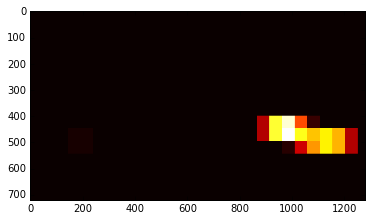

In [24]:
heatmaps = create_heatmaps(bboxes_list)
heatmap = heatmaps[0]

### 5. Estimate a bounding box for vehicles detected.

2 cars found


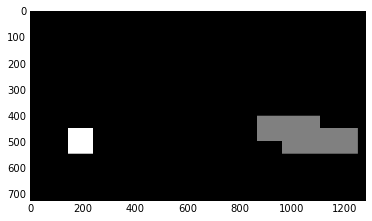

In [26]:
from scipy.ndimage.measurements import label

labels = label(heatmap)

"""
Now labels is a 2-tuple, where the first item is 
an array the size of the heatmap input image and 
the second element is the number of labels (cars) found.

"""
print(labels[1], 'cars found')
plt.imshow(labels[0], cmap='gray')

In [20]:
# Implement using a queue of length `recent_frames_used`.
# MVP can just go through the array each time cause I'm lazy

def draw_filtered_bboxes(image, all_bboxes, recent_frames_used=20, threshold=10): 
    """`all_bboxes` is an array of arrays of bboxes.
    Each element represents a frame. Each element is an array of bboxes found in
    that frame."""
    
    # Add bounding boxes from this frame
    add_bboxes(image, windows, svc, X_scaler, draw=False)
    
    if len(all_bboxes) < recent_frames_used + 1:
        recent_frames_used = len(all_bboxes) - 1
    
    frame_heatmap = np.zeros_like(image[:,:,0])
    
    for boxlist in all_bboxes[-recent_frames_used:]:
        frame_heatmap = add_heat(frame_heatmap, boxlist)
    
    # Apply threshold
    frame_heatmap = apply_threshold(frame_heatmap, threshold)
    
    labels = label(frame_heatmap)
    draw_img = draw_labeled_bboxes(np.copy(image), labels)
    
    plt.imshow(draw_img)
    return draw_img

In [13]:
def process_image(image):
    global bboxes_list    
    
    return draw_filtered_bboxes(image, bboxes_list)

Hot windows:  []
[MoviePy] >>>> Building video output_36_40.mp4
[MoviePy] Writing video output_36_40.mp4


  0%|          | 1/376 [00:01<06:29,  1.04s/it]

Hot windows:  []


  1%|          | 2/376 [00:02<06:31,  1.05s/it]

Hot windows:  []


  1%|          | 3/376 [00:03<06:31,  1.05s/it]

Hot windows:  []


  1%|          | 4/376 [00:04<06:19,  1.02s/it]

Hot windows:  []


  1%|▏         | 5/376 [00:05<06:08,  1.01it/s]

Hot windows:  []


  2%|▏         | 6/376 [00:06<06:04,  1.02it/s]

Hot windows:  []


  2%|▏         | 7/376 [00:07<06:22,  1.04s/it]

Hot windows:  []


  2%|▏         | 8/376 [00:08<06:53,  1.12s/it]

Hot windows:  []


  2%|▏         | 9/376 [00:11<09:26,  1.54s/it]

Hot windows:  []


  3%|▎         | 10/376 [00:13<10:34,  1.73s/it]

Hot windows:  []


  3%|▎         | 11/376 [00:15<11:57,  1.97s/it]

Hot windows:  []


  3%|▎         | 12/376 [00:18<13:07,  2.16s/it]

Hot windows:  []


  3%|▎         | 13/376 [00:20<13:16,  2.19s/it]

Hot windows:  []


  4%|▎         | 14/376 [00:22<13:08,  2.18s/it]

Hot windows:  []


  4%|▍         | 15/376 [00:24<13:10,  2.19s/it]

Hot windows:  []


  4%|▍         | 16/376 [00:26<12:38,  2.11s/it]

Hot windows:  []


  5%|▍         | 17/376 [00:28<12:10,  2.04s/it]

Hot windows:  []


  5%|▍         | 18/376 [00:30<11:52,  1.99s/it]

Hot windows:  []


  5%|▌         | 19/376 [00:32<12:25,  2.09s/it]

Hot windows:  []


  5%|▌         | 20/376 [00:35<12:32,  2.11s/it]

Hot windows:  []


  6%|▌         | 21/376 [00:37<12:52,  2.18s/it]

Hot windows:  []


  6%|▌         | 22/376 [00:39<12:37,  2.14s/it]

Hot windows:  []


  6%|▌         | 23/376 [00:41<12:59,  2.21s/it]

Hot windows:  []


  6%|▋         | 24/376 [00:43<12:37,  2.15s/it]

Hot windows:  []


  7%|▋         | 25/376 [00:46<13:19,  2.28s/it]

Hot windows:  []


  7%|▋         | 26/376 [00:49<13:50,  2.37s/it]

Hot windows:  []


  7%|▋         | 27/376 [00:51<14:17,  2.46s/it]

Hot windows:  []


  7%|▋         | 28/376 [00:54<14:49,  2.56s/it]

Hot windows:  []


  8%|▊         | 29/376 [00:57<14:53,  2.58s/it]

Hot windows:  []


  8%|▊         | 30/376 [00:59<14:31,  2.52s/it]

Hot windows:  []


  8%|▊         | 31/376 [01:01<13:14,  2.30s/it]

Hot windows:  []


  9%|▊         | 32/376 [01:02<12:00,  2.09s/it]

Hot windows:  []


  9%|▉         | 33/376 [01:04<10:51,  1.90s/it]

Hot windows:  []


  9%|▉         | 34/376 [01:06<10:59,  1.93s/it]

Hot windows:  []


  9%|▉         | 35/376 [01:08<11:26,  2.01s/it]

Hot windows:  []


 10%|▉         | 36/376 [01:10<10:54,  1.93s/it]

Hot windows:  []


 10%|▉         | 37/376 [01:12<10:33,  1.87s/it]

Hot windows:  []


 10%|█         | 38/376 [01:13<10:09,  1.80s/it]

Hot windows:  []


 10%|█         | 39/376 [01:15<09:51,  1.76s/it]

Hot windows:  []


 11%|█         | 40/376 [01:17<09:58,  1.78s/it]

Hot windows:  []


 11%|█         | 41/376 [01:18<09:55,  1.78s/it]

Hot windows:  []


 11%|█         | 42/376 [01:20<10:08,  1.82s/it]

Hot windows:  []


 11%|█▏        | 43/376 [01:23<10:54,  1.96s/it]

Hot windows:  []


 12%|█▏        | 44/376 [01:25<10:44,  1.94s/it]

Hot windows:  []


 12%|█▏        | 45/376 [01:27<10:46,  1.95s/it]

Hot windows:  []


 12%|█▏        | 46/376 [01:28<10:34,  1.92s/it]

Hot windows:  []


 12%|█▎        | 47/376 [01:30<10:25,  1.90s/it]

Hot windows:  []


 13%|█▎        | 48/376 [01:32<10:28,  1.91s/it]

Hot windows:  []


 13%|█▎        | 49/376 [01:34<10:13,  1.88s/it]

Hot windows:  []


 13%|█▎        | 50/376 [01:36<10:00,  1.84s/it]

Hot windows:  []


 14%|█▎        | 51/376 [01:38<09:58,  1.84s/it]

Hot windows:  []


 14%|█▍        | 52/376 [01:40<10:08,  1.88s/it]

Hot windows:  []


 14%|█▍        | 53/376 [01:41<10:00,  1.86s/it]

Hot windows:  []


 14%|█▍        | 54/376 [01:43<10:00,  1.86s/it]

Hot windows:  []


 15%|█▍        | 55/376 [01:45<09:51,  1.84s/it]

Hot windows:  []


 15%|█▍        | 56/376 [01:47<10:00,  1.88s/it]

Hot windows:  []


 15%|█▌        | 57/376 [01:49<09:55,  1.87s/it]

Hot windows:  []


 15%|█▌        | 58/376 [01:51<09:46,  1.85s/it]

Hot windows:  []


 16%|█▌        | 59/376 [01:53<09:53,  1.87s/it]

Hot windows:  []


 16%|█▌        | 60/376 [01:55<10:10,  1.93s/it]

Hot windows:  []


 16%|█▌        | 61/376 [01:57<10:43,  2.04s/it]

Hot windows:  []


 16%|█▋        | 62/376 [01:59<10:49,  2.07s/it]

Hot windows:  []
Hot windows:  []


 17%|█▋        | 64/376 [02:05<12:52,  2.48s/it]

Hot windows:  []
Hot windows:  [((1208, 464), (1272, 528))]


 18%|█▊        | 66/376 [02:10<13:31,  2.62s/it]

Hot windows:  [((1208, 464), (1272, 528))]


 18%|█▊        | 67/376 [02:13<12:53,  2.50s/it]

Hot windows:  [((1208, 464), (1272, 528))]


 18%|█▊        | 68/376 [02:14<11:46,  2.29s/it]

Hot windows:  [((1176, 464), (1240, 528)), ((1208, 464), (1272, 528))]


 18%|█▊        | 69/376 [02:16<10:24,  2.03s/it]

Hot windows:  [((1176, 464), (1240, 528)), ((1208, 464), (1272, 528))]


 19%|█▊        | 70/376 [02:17<09:25,  1.85s/it]

Hot windows:  [((1176, 464), (1240, 528)), ((1208, 464), (1272, 528))]


 19%|█▉        | 71/376 [02:19<08:57,  1.76s/it]

Hot windows:  [((1144, 464), (1208, 528)), ((1176, 464), (1240, 528)), ((1208, 464), (1272, 528))]


 19%|█▉        | 72/376 [02:20<08:46,  1.73s/it]

Hot windows:  [((1144, 464), (1208, 528)), ((1176, 464), (1240, 528)), ((1208, 464), (1272, 528))]


 19%|█▉        | 73/376 [02:22<08:30,  1.68s/it]

Hot windows:  [((1144, 464), (1208, 528)), ((1176, 464), (1240, 528)), ((1208, 464), (1272, 528))]


 20%|█▉        | 74/376 [02:23<08:00,  1.59s/it]

Hot windows:  [((1144, 464), (1208, 528)), ((1176, 464), (1240, 528)), ((1208, 464), (1272, 528))]


 20%|█▉        | 75/376 [02:25<08:07,  1.62s/it]

Hot windows:  [((1144, 464), (1208, 528)), ((1176, 464), (1240, 528)), ((1208, 464), (1272, 528))]


 20%|██        | 76/376 [02:28<09:32,  1.91s/it]

Hot windows:  [((1112, 464), (1176, 528)), ((1144, 464), (1208, 528)), ((1176, 464), (1240, 528)), ((1208, 464), (1272, 528))]


 20%|██        | 77/376 [02:30<09:57,  2.00s/it]

Hot windows:  [((1112, 464), (1176, 528)), ((1144, 464), (1208, 528)), ((1176, 464), (1240, 528)), ((1208, 464), (1272, 528))]


 21%|██        | 78/376 [02:32<09:51,  1.99s/it]

Hot windows:  [((1112, 464), (1176, 528)), ((1144, 464), (1208, 528)), ((1176, 464), (1240, 528)), ((1208, 464), (1272, 528))]


 21%|██        | 79/376 [02:34<09:35,  1.94s/it]

Hot windows:  [((1112, 464), (1176, 528)), ((1144, 464), (1208, 528)), ((1176, 464), (1240, 528)), ((1208, 464), (1272, 528))]


 21%|██▏       | 80/376 [02:35<09:04,  1.84s/it]

Hot windows:  [((1112, 464), (1176, 528)), ((1144, 464), (1208, 528)), ((1176, 464), (1240, 528)), ((1208, 464), (1272, 528))]


 22%|██▏       | 81/376 [02:37<08:25,  1.71s/it]

Hot windows:  [((1080, 464), (1144, 528)), ((1112, 464), (1176, 528)), ((1144, 464), (1208, 528)), ((1176, 464), (1240, 528))]


 22%|██▏       | 82/376 [02:38<07:53,  1.61s/it]

Hot windows:  [((1080, 464), (1144, 528)), ((1112, 464), (1176, 528)), ((1144, 464), (1208, 528)), ((1176, 464), (1240, 528))]


 22%|██▏       | 83/376 [02:40<07:46,  1.59s/it]

Hot windows:  [((1080, 464), (1144, 528)), ((1112, 464), (1176, 528)), ((1144, 464), (1208, 528))]


 22%|██▏       | 84/376 [02:41<07:50,  1.61s/it]

Hot windows:  [((1080, 464), (1144, 528)), ((1112, 464), (1176, 528)), ((1144, 464), (1208, 528))]


 23%|██▎       | 85/376 [02:43<07:40,  1.58s/it]

Hot windows:  [((1080, 464), (1144, 528)), ((1112, 464), (1176, 528)), ((1144, 464), (1208, 528))]


 23%|██▎       | 86/376 [02:44<07:20,  1.52s/it]

Hot windows:  [((1080, 464), (1144, 528)), ((1112, 464), (1176, 528)), ((1144, 464), (1208, 528))]


 23%|██▎       | 87/376 [02:46<07:05,  1.47s/it]

Hot windows:  [((1080, 464), (1144, 528)), ((1112, 464), (1176, 528))]


 23%|██▎       | 88/376 [02:47<07:06,  1.48s/it]

Hot windows:  [((1080, 464), (1144, 528)), ((1112, 464), (1176, 528))]


 24%|██▎       | 89/376 [02:49<07:04,  1.48s/it]

Hot windows:  [((1080, 464), (1144, 528)), ((1112, 464), (1176, 528))]


 24%|██▍       | 90/376 [02:51<08:19,  1.75s/it]

Hot windows:  [((1080, 464), (1144, 528)), ((1112, 464), (1176, 528))]
Hot windows:  [((1048, 464), (1112, 528)), ((1080, 464), (1144, 528))]


 24%|██▍       | 92/376 [02:57<11:09,  2.36s/it]

Hot windows:  [((1048, 464), (1112, 528)), ((1080, 464), (1144, 528))]


 25%|██▍       | 93/376 [02:59<10:57,  2.32s/it]

Hot windows:  [((1080, 464), (1144, 528)), ((1176, 560), (1240, 624))]


 25%|██▌       | 94/376 [03:01<09:44,  2.07s/it]

Hot windows:  [((1080, 464), (1144, 528)), ((1176, 560), (1240, 624))]


 25%|██▌       | 95/376 [03:02<08:12,  1.75s/it]

Hot windows:  [((1080, 464), (1144, 528)), ((1176, 560), (1240, 624))]


 26%|██▌       | 96/376 [03:03<07:08,  1.53s/it]

Hot windows:  [((1176, 560), (1240, 624))]


 26%|██▌       | 97/376 [03:03<06:12,  1.34s/it]

Hot windows:  []


 26%|██▌       | 98/376 [03:04<05:31,  1.19s/it]

Hot windows:  []


 26%|██▋       | 99/376 [03:05<05:02,  1.09s/it]

Hot windows:  [((1048, 432), (1112, 496)), ((1048, 464), (1112, 528))]


 27%|██▋       | 100/376 [03:06<04:41,  1.02s/it]

Hot windows:  [((1048, 432), (1112, 496))]


 27%|██▋       | 101/376 [03:07<04:27,  1.03it/s]

Hot windows:  [((1048, 432), (1112, 496)), ((1208, 496), (1272, 560))]


 27%|██▋       | 102/376 [03:08<04:21,  1.05it/s]

Hot windows:  [((1048, 432), (1112, 496)), ((1208, 496), (1272, 560))]


 27%|██▋       | 103/376 [03:09<04:26,  1.03it/s]

Hot windows:  [((1048, 432), (1112, 496)), ((1208, 432), (1272, 496)), ((1208, 496), (1272, 560))]


 28%|██▊       | 104/376 [03:10<04:17,  1.06it/s]

Hot windows:  [((1048, 432), (1112, 496)), ((1208, 432), (1272, 496)), ((1208, 496), (1272, 560))]


 28%|██▊       | 105/376 [03:11<04:08,  1.09it/s]

Hot windows:  [((1208, 496), (1272, 560)), ((1208, 528), (1272, 592))]


 28%|██▊       | 106/376 [03:11<04:02,  1.11it/s]

Hot windows:  [((1208, 496), (1272, 560)), ((1208, 528), (1272, 592))]


 28%|██▊       | 107/376 [03:12<03:58,  1.13it/s]

Hot windows:  [((1176, 496), (1240, 560)), ((1208, 496), (1272, 560)), ((1208, 528), (1272, 592))]


 29%|██▊       | 108/376 [03:13<03:54,  1.14it/s]

Hot windows:  [((1176, 496), (1240, 560)), ((1208, 496), (1272, 560))]


 29%|██▉       | 109/376 [03:14<03:52,  1.15it/s]

Hot windows:  [((1176, 432), (1240, 496)), ((1176, 496), (1240, 560)), ((1208, 496), (1272, 560)), ((1176, 528), (1240, 592)), ((1208, 528), (1272, 592))]


 29%|██▉       | 110/376 [03:15<03:50,  1.15it/s]

Hot windows:  [((1016, 432), (1080, 496)), ((1176, 432), (1240, 496)), ((1176, 496), (1240, 560)), ((1208, 496), (1272, 560)), ((1176, 528), (1240, 592)), ((1208, 528), (1272, 592))]


 30%|██▉       | 111/376 [03:16<03:48,  1.16it/s]

Hot windows:  [((1016, 432), (1080, 496)), ((1176, 496), (1240, 560)), ((1208, 496), (1272, 560)), ((1080, 528), (1144, 592)), ((1176, 528), (1240, 592)), ((1208, 528), (1272, 592))]


 30%|██▉       | 112/376 [03:17<03:49,  1.15it/s]

Hot windows:  [((1176, 496), (1240, 560)), ((1208, 496), (1272, 560)), ((1176, 528), (1240, 592)), ((1208, 528), (1272, 592))]


 30%|███       | 113/376 [03:17<03:49,  1.14it/s]

Hot windows:  [((1144, 496), (1208, 560)), ((1144, 528), (1208, 592)), ((1176, 528), (1240, 592)), ((1208, 528), (1272, 592))]


 30%|███       | 114/376 [03:18<03:54,  1.12it/s]

Hot windows:  [((1208, 464), (1272, 528)), ((1208, 496), (1272, 560)), ((1144, 528), (1208, 592)), ((1176, 528), (1240, 592)), ((1208, 528), (1272, 592))]


 31%|███       | 115/376 [03:19<03:56,  1.11it/s]

Hot windows:  [((1208, 464), (1272, 528)), ((1176, 496), (1240, 560)), ((1208, 496), (1272, 560)), ((1144, 528), (1208, 592)), ((1176, 528), (1240, 592))]


 31%|███       | 116/376 [03:20<03:50,  1.13it/s]

Hot windows:  [((1176, 464), (1240, 528)), ((1176, 496), (1240, 560)), ((1208, 496), (1272, 560)), ((1144, 528), (1208, 592))]


 31%|███       | 117/376 [03:21<03:47,  1.14it/s]

Hot windows:  [((1176, 464), (1240, 528)), ((1176, 496), (1240, 560)), ((1144, 528), (1208, 592))]


 31%|███▏      | 118/376 [03:22<03:46,  1.14it/s]

Hot windows:  [((1176, 464), (1240, 528)), ((1208, 464), (1272, 528))]


 32%|███▏      | 119/376 [03:23<03:43,  1.15it/s]

Hot windows:  [((1176, 464), (1240, 528)), ((1208, 496), (1272, 560))]


 32%|███▏      | 120/376 [03:24<03:40,  1.16it/s]

Hot windows:  [((1176, 464), (1240, 528)), ((1208, 496), (1272, 560))]


 32%|███▏      | 121/376 [03:24<03:38,  1.17it/s]

Hot windows:  [((1144, 464), (1208, 528)), ((1176, 464), (1240, 528)), ((1208, 464), (1272, 528))]


 32%|███▏      | 122/376 [03:25<03:36,  1.17it/s]

Hot windows:  [((1144, 464), (1208, 528)), ((1176, 464), (1240, 528)), ((1208, 464), (1272, 528))]


 33%|███▎      | 123/376 [03:26<03:36,  1.17it/s]

Hot windows:  [((1112, 464), (1176, 528)), ((1144, 464), (1208, 528)), ((1176, 464), (1240, 528))]


 33%|███▎      | 124/376 [03:27<03:35,  1.17it/s]

Hot windows:  [((1112, 464), (1176, 528)), ((1144, 464), (1208, 528)), ((1176, 464), (1240, 528))]


 33%|███▎      | 125/376 [03:28<03:34,  1.17it/s]

Hot windows:  [((1112, 464), (1176, 528)), ((1144, 464), (1208, 528)), ((1176, 464), (1240, 528))]


 34%|███▎      | 126/376 [03:29<03:34,  1.17it/s]

Hot windows:  [((1112, 464), (1176, 528)), ((1144, 464), (1208, 528)), ((1176, 464), (1240, 528))]


 34%|███▍      | 127/376 [03:30<03:44,  1.11it/s]

Hot windows:  [((1112, 464), (1176, 528)), ((1176, 464), (1240, 528))]


 34%|███▍      | 128/376 [03:31<03:46,  1.10it/s]

Hot windows:  [((1112, 464), (1176, 528)), ((1176, 464), (1240, 528))]


 34%|███▍      | 129/376 [03:32<03:48,  1.08it/s]

Hot windows:  [((1112, 464), (1176, 528)), ((1176, 464), (1240, 528))]


 35%|███▍      | 130/376 [03:33<03:49,  1.07it/s]

Hot windows:  [((1112, 464), (1176, 528)), ((1176, 464), (1240, 528))]


 35%|███▍      | 131/376 [03:33<03:48,  1.07it/s]

Hot windows:  [((1112, 464), (1176, 528)), ((1144, 464), (1208, 528)), ((1176, 464), (1240, 528))]


 35%|███▌      | 132/376 [03:34<03:50,  1.06it/s]

Hot windows:  [((1112, 464), (1176, 528)), ((1144, 464), (1208, 528)), ((1176, 464), (1240, 528))]


 35%|███▌      | 133/376 [03:36<04:06,  1.01s/it]

Hot windows:  [((1112, 464), (1176, 528)), ((1144, 464), (1208, 528))]


 36%|███▌      | 134/376 [03:37<04:18,  1.07s/it]

Hot windows:  [((1080, 464), (1144, 528)), ((1112, 464), (1176, 528)), ((1144, 464), (1208, 528))]


 36%|███▌      | 135/376 [03:38<04:14,  1.06s/it]

Hot windows:  [((1080, 464), (1144, 528)), ((1144, 464), (1208, 528))]


 36%|███▌      | 136/376 [03:39<04:05,  1.02s/it]

Hot windows:  [((1080, 464), (1144, 528)), ((1144, 464), (1208, 528))]


 36%|███▋      | 137/376 [03:40<04:05,  1.03s/it]

Hot windows:  [((1080, 464), (1144, 528)), ((1144, 464), (1208, 528))]


 37%|███▋      | 138/376 [03:41<04:06,  1.04s/it]

Hot windows:  [((1080, 464), (1144, 528)), ((1144, 464), (1208, 528))]


 37%|███▋      | 139/376 [03:42<04:25,  1.12s/it]

Hot windows:  [((1080, 464), (1144, 528)), ((1144, 464), (1208, 528)), ((1112, 496), (1176, 560))]


 37%|███▋      | 140/376 [03:44<04:42,  1.20s/it]

Hot windows:  [((1080, 464), (1144, 528)), ((1144, 464), (1208, 528)), ((1080, 496), (1144, 560)), ((1112, 496), (1176, 560))]


 38%|███▊      | 141/376 [03:45<04:31,  1.16s/it]

Hot windows:  [((1080, 464), (1144, 528)), ((1144, 464), (1208, 528)), ((1080, 496), (1144, 560)), ((1112, 496), (1176, 560))]


 38%|███▊      | 142/376 [03:46<04:20,  1.11s/it]

Hot windows:  [((1080, 464), (1144, 528)), ((1144, 464), (1208, 528))]


 38%|███▊      | 143/376 [03:47<04:10,  1.07s/it]

Hot windows:  [((1080, 464), (1144, 528)), ((1144, 464), (1208, 528))]


 38%|███▊      | 144/376 [03:48<04:03,  1.05s/it]

Hot windows:  [((1080, 464), (1144, 528))]


 39%|███▊      | 145/376 [03:49<04:01,  1.05s/it]

Hot windows:  [((1080, 464), (1144, 528))]


 39%|███▉      | 146/376 [03:50<04:19,  1.13s/it]

Hot windows:  [((1080, 464), (1144, 528))]


 39%|███▉      | 147/376 [03:51<04:26,  1.16s/it]

Hot windows:  [((1048, 464), (1112, 528)), ((1080, 464), (1144, 528))]


 39%|███▉      | 148/376 [03:52<04:31,  1.19s/it]

Hot windows:  [((1048, 464), (1112, 528))]


 40%|███▉      | 149/376 [03:54<04:42,  1.24s/it]

Hot windows:  [((1048, 464), (1112, 528))]


 40%|███▉      | 150/376 [03:55<04:39,  1.24s/it]

Hot windows:  [((1048, 464), (1112, 528))]


 40%|████      | 151/376 [03:56<04:30,  1.20s/it]

Hot windows:  [((1048, 464), (1112, 528))]


 40%|████      | 152/376 [03:57<04:17,  1.15s/it]

Hot windows:  [((1048, 464), (1112, 528)), ((1112, 464), (1176, 528))]


 41%|████      | 153/376 [03:58<04:13,  1.14s/it]

Hot windows:  [((1048, 464), (1112, 528)), ((1112, 464), (1176, 528))]


 41%|████      | 154/376 [03:59<03:59,  1.08s/it]

Hot windows:  [((1048, 464), (1112, 528))]


 41%|████      | 155/376 [04:00<03:47,  1.03s/it]

Hot windows:  [((1048, 464), (1112, 528))]


 41%|████▏     | 156/376 [04:01<03:40,  1.00s/it]

Hot windows:  [((1048, 464), (1112, 528))]


 42%|████▏     | 157/376 [04:02<03:40,  1.01s/it]

Hot windows:  [((1048, 464), (1112, 528))]


 42%|████▏     | 158/376 [04:03<03:44,  1.03s/it]

Hot windows:  [((1048, 464), (1112, 528))]


 42%|████▏     | 159/376 [04:04<03:42,  1.02s/it]

Hot windows:  [((1048, 464), (1112, 528))]


 43%|████▎     | 160/376 [04:05<03:35,  1.00it/s]

Hot windows:  [((1048, 464), (1112, 528))]


 43%|████▎     | 161/376 [04:06<03:31,  1.02it/s]

Hot windows:  [((1048, 464), (1112, 528))]


 43%|████▎     | 162/376 [04:07<03:26,  1.03it/s]

Hot windows:  [((1080, 432), (1144, 496)), ((1048, 464), (1112, 528))]


 43%|████▎     | 163/376 [04:08<03:26,  1.03it/s]

Hot windows:  [((1080, 432), (1144, 496)), ((1048, 464), (1112, 528))]


 44%|████▎     | 164/376 [04:09<03:18,  1.07it/s]

Hot windows:  [((1016, 464), (1080, 528)), ((1048, 464), (1112, 528))]


 44%|████▍     | 165/376 [04:10<03:17,  1.07it/s]

Hot windows:  [((1016, 464), (1080, 528)), ((1048, 464), (1112, 528))]


 44%|████▍     | 166/376 [04:11<03:13,  1.09it/s]

Hot windows:  [((1016, 464), (1080, 528)), ((1048, 464), (1112, 528))]


 44%|████▍     | 167/376 [04:12<03:10,  1.10it/s]

Hot windows:  [((1016, 464), (1080, 528)), ((1048, 464), (1112, 528))]


 45%|████▍     | 168/376 [04:12<03:04,  1.13it/s]

Hot windows:  [((1016, 464), (1080, 528)), ((1048, 464), (1112, 528))]


 45%|████▍     | 169/376 [04:13<03:01,  1.14it/s]

Hot windows:  [((1016, 464), (1080, 528)), ((1048, 464), (1112, 528))]


 45%|████▌     | 170/376 [04:14<02:58,  1.15it/s]

Hot windows:  [((1016, 464), (1080, 528)), ((1048, 464), (1112, 528))]


 45%|████▌     | 171/376 [04:15<02:54,  1.17it/s]

Hot windows:  [((1016, 464), (1080, 528)), ((1048, 464), (1112, 528))]


 46%|████▌     | 172/376 [04:16<02:54,  1.17it/s]

Hot windows:  [((1016, 464), (1080, 528)), ((1048, 464), (1112, 528))]


 46%|████▌     | 173/376 [04:17<02:52,  1.17it/s]

Hot windows:  [((1016, 464), (1080, 528))]


 46%|████▋     | 174/376 [04:18<02:57,  1.14it/s]

Hot windows:  [((1016, 464), (1080, 528))]


 47%|████▋     | 175/376 [04:19<02:59,  1.12it/s]

Hot windows:  [((1048, 432), (1112, 496)), ((1016, 464), (1080, 528))]


 47%|████▋     | 176/376 [04:19<03:02,  1.10it/s]

Hot windows:  [((1048, 432), (1112, 496)), ((1016, 464), (1080, 528))]


 47%|████▋     | 177/376 [04:20<03:06,  1.07it/s]

Hot windows:  [((1048, 432), (1112, 496)), ((1016, 464), (1080, 528))]


 47%|████▋     | 178/376 [04:21<03:03,  1.08it/s]

Hot windows:  [((1048, 432), (1112, 496)), ((1016, 464), (1080, 528))]


 48%|████▊     | 179/376 [04:22<02:57,  1.11it/s]

Hot windows:  [((1048, 432), (1112, 496)), ((1016, 464), (1080, 528))]


 48%|████▊     | 180/376 [04:23<02:53,  1.13it/s]

Hot windows:  [((1048, 432), (1112, 496)), ((1016, 464), (1080, 528))]


 48%|████▊     | 181/376 [04:24<02:50,  1.14it/s]

Hot windows:  [((984, 464), (1048, 528)), ((1016, 464), (1080, 528))]


 48%|████▊     | 182/376 [04:25<02:48,  1.15it/s]

Hot windows:  [((984, 464), (1048, 528)), ((1016, 464), (1080, 528))]


 49%|████▊     | 183/376 [04:26<02:49,  1.14it/s]

Hot windows:  [((984, 464), (1048, 528)), ((1016, 464), (1080, 528))]


 49%|████▉     | 184/376 [04:27<02:47,  1.15it/s]

Hot windows:  [((984, 464), (1048, 528)), ((1016, 464), (1080, 528))]


 49%|████▉     | 185/376 [04:27<02:51,  1.11it/s]

Hot windows:  [((1016, 432), (1080, 496)), ((984, 464), (1048, 528)), ((1016, 464), (1080, 528))]


 49%|████▉     | 186/376 [04:29<02:59,  1.06it/s]

Hot windows:  [((1016, 432), (1080, 496)), ((984, 464), (1048, 528)), ((1016, 464), (1080, 528))]


 50%|████▉     | 187/376 [04:29<02:58,  1.06it/s]

Hot windows:  [((1016, 432), (1080, 496)), ((984, 464), (1048, 528))]


 50%|█████     | 188/376 [04:31<03:03,  1.02it/s]

Hot windows:  [((1016, 432), (1080, 496)), ((984, 464), (1048, 528))]


 50%|█████     | 189/376 [04:31<03:00,  1.04it/s]

Hot windows:  [((984, 464), (1048, 528))]


 51%|█████     | 190/376 [04:32<02:52,  1.08it/s]

Hot windows:  [((1016, 432), (1080, 496)), ((984, 464), (1048, 528))]


 51%|█████     | 191/376 [04:33<02:51,  1.08it/s]

Hot windows:  [((1016, 432), (1080, 496)), ((984, 464), (1048, 528))]


 51%|█████     | 192/376 [04:34<03:03,  1.00it/s]

Hot windows:  [((1016, 432), (1080, 496)), ((984, 464), (1048, 528))]


 51%|█████▏    | 193/376 [04:36<03:11,  1.05s/it]

Hot windows:  [((1016, 432), (1080, 496)), ((984, 464), (1048, 528))]


 52%|█████▏    | 194/376 [04:37<03:14,  1.07s/it]

Hot windows:  [((1016, 432), (1080, 496)), ((984, 464), (1048, 528))]


 52%|█████▏    | 195/376 [04:38<03:26,  1.14s/it]

Hot windows:  [((1016, 432), (1080, 496)), ((984, 464), (1048, 528))]


 52%|█████▏    | 196/376 [04:39<03:25,  1.14s/it]

Hot windows:  [((1016, 432), (1080, 496))]


 52%|█████▏    | 197/376 [04:40<03:23,  1.14s/it]

Hot windows:  []


 53%|█████▎    | 198/376 [04:41<03:18,  1.11s/it]

Hot windows:  []


 53%|█████▎    | 199/376 [04:42<03:13,  1.09s/it]

Hot windows:  [((984, 432), (1048, 496))]


 53%|█████▎    | 200/376 [04:43<03:11,  1.09s/it]

Hot windows:  []


 53%|█████▎    | 201/376 [04:45<03:10,  1.09s/it]

Hot windows:  []


 54%|█████▎    | 202/376 [04:46<03:13,  1.11s/it]

Hot windows:  []


 54%|█████▍    | 203/376 [04:47<03:07,  1.09s/it]

Hot windows:  []


 54%|█████▍    | 204/376 [04:48<03:03,  1.07s/it]

Hot windows:  [((984, 432), (1048, 496))]


 55%|█████▍    | 205/376 [04:49<02:54,  1.02s/it]

Hot windows:  [((984, 432), (1048, 496))]


 55%|█████▍    | 206/376 [04:50<02:45,  1.02it/s]

Hot windows:  [((984, 432), (1048, 496))]


 55%|█████▌    | 207/376 [04:50<02:40,  1.05it/s]

Hot windows:  [((984, 432), (1048, 496))]


 55%|█████▌    | 208/376 [04:51<02:36,  1.07it/s]

Hot windows:  [((984, 432), (1048, 496))]


 56%|█████▌    | 209/376 [04:52<02:32,  1.10it/s]

Hot windows:  [((984, 432), (1048, 496))]


 56%|█████▌    | 210/376 [04:53<02:34,  1.08it/s]

Hot windows:  []


 56%|█████▌    | 211/376 [04:54<02:33,  1.08it/s]

Hot windows:  []


 56%|█████▋    | 212/376 [04:55<02:40,  1.02it/s]

Hot windows:  [((952, 432), (1016, 496))]


 57%|█████▋    | 213/376 [04:56<02:44,  1.01s/it]

Hot windows:  [((952, 432), (1016, 496))]


 57%|█████▋    | 214/376 [04:57<02:44,  1.01s/it]

Hot windows:  [((952, 432), (1016, 496))]


 57%|█████▋    | 215/376 [04:58<02:38,  1.01it/s]

Hot windows:  [((952, 432), (1016, 496))]


 57%|█████▋    | 216/376 [04:59<02:32,  1.05it/s]

Hot windows:  [((952, 432), (1016, 496))]


 58%|█████▊    | 217/376 [05:00<02:27,  1.08it/s]

Hot windows:  [((952, 432), (1016, 496))]


 58%|█████▊    | 218/376 [05:01<02:24,  1.09it/s]

Hot windows:  [((952, 432), (1016, 496))]


 58%|█████▊    | 219/376 [05:02<02:20,  1.12it/s]

Hot windows:  [((952, 432), (1016, 496))]


 59%|█████▊    | 220/376 [05:03<02:18,  1.13it/s]

Hot windows:  [((952, 432), (1016, 496))]


 59%|█████▉    | 221/376 [05:03<02:16,  1.13it/s]

Hot windows:  [((952, 432), (1016, 496))]


 59%|█████▉    | 222/376 [05:04<02:14,  1.14it/s]

Hot windows:  [((952, 432), (1016, 496))]


 59%|█████▉    | 223/376 [05:05<02:13,  1.15it/s]

Hot windows:  [((952, 432), (1016, 496))]


 60%|█████▉    | 224/376 [05:06<02:13,  1.14it/s]

Hot windows:  [((920, 432), (984, 496)), ((952, 432), (1016, 496))]


 60%|█████▉    | 225/376 [05:07<02:13,  1.13it/s]

Hot windows:  [((920, 432), (984, 496)), ((952, 432), (1016, 496))]


 60%|██████    | 226/376 [05:08<02:11,  1.14it/s]

Hot windows:  [((920, 432), (984, 496)), ((952, 432), (1016, 496))]


 60%|██████    | 227/376 [05:09<02:14,  1.11it/s]

Hot windows:  [((920, 432), (984, 496)), ((952, 432), (1016, 496))]


 61%|██████    | 228/376 [05:10<02:21,  1.05it/s]

Hot windows:  [((920, 432), (984, 496)), ((952, 432), (1016, 496))]


 61%|██████    | 229/376 [05:11<02:20,  1.05it/s]

Hot windows:  [((920, 432), (984, 496)), ((952, 432), (1016, 496))]


 61%|██████    | 230/376 [05:12<02:15,  1.08it/s]

Hot windows:  [((920, 432), (984, 496)), ((952, 432), (1016, 496))]


 61%|██████▏   | 231/376 [05:12<02:11,  1.10it/s]

Hot windows:  [((920, 432), (984, 496)), ((952, 432), (1016, 496))]


 62%|██████▏   | 232/376 [05:13<02:08,  1.12it/s]

Hot windows:  [((920, 432), (984, 496)), ((952, 432), (1016, 496))]


 62%|██████▏   | 233/376 [05:14<02:05,  1.14it/s]

Hot windows:  [((920, 432), (984, 496)), ((952, 432), (1016, 496))]


 62%|██████▏   | 234/376 [05:15<02:03,  1.15it/s]

Hot windows:  [((920, 432), (984, 496)), ((952, 432), (1016, 496))]


 62%|██████▎   | 235/376 [05:16<02:01,  1.16it/s]

Hot windows:  [((920, 432), (984, 496)), ((952, 432), (1016, 496))]


 63%|██████▎   | 236/376 [05:17<02:00,  1.16it/s]

Hot windows:  [((920, 432), (984, 496))]


 63%|██████▎   | 237/376 [05:18<01:59,  1.17it/s]

Hot windows:  [((920, 432), (984, 496))]


 63%|██████▎   | 238/376 [05:18<01:57,  1.18it/s]

Hot windows:  [((920, 432), (984, 496))]


 64%|██████▎   | 239/376 [05:19<01:56,  1.18it/s]

Hot windows:  [((920, 432), (984, 496))]


 64%|██████▍   | 240/376 [05:20<01:55,  1.17it/s]

Hot windows:  [((920, 432), (984, 496))]


 64%|██████▍   | 241/376 [05:21<01:54,  1.18it/s]

Hot windows:  [((920, 432), (984, 496))]


 64%|██████▍   | 242/376 [05:22<01:54,  1.17it/s]

Hot windows:  [((920, 432), (984, 496))]


 65%|██████▍   | 243/376 [05:23<01:53,  1.17it/s]

Hot windows:  [((920, 432), (984, 496))]


 65%|██████▍   | 244/376 [05:24<01:52,  1.17it/s]

Hot windows:  [((920, 432), (984, 496))]


 65%|██████▌   | 245/376 [05:24<01:51,  1.17it/s]

Hot windows:  [((920, 432), (984, 496))]


 65%|██████▌   | 246/376 [05:25<01:51,  1.16it/s]

Hot windows:  [((920, 432), (984, 496))]


 66%|██████▌   | 247/376 [05:26<01:51,  1.16it/s]

Hot windows:  [((920, 432), (984, 496))]


 66%|██████▌   | 248/376 [05:27<01:50,  1.15it/s]

Hot windows:  [((920, 432), (984, 496))]


 66%|██████▌   | 249/376 [05:28<01:50,  1.15it/s]

Hot windows:  [((888, 432), (952, 496)), ((920, 432), (984, 496))]


 66%|██████▋   | 250/376 [05:29<01:48,  1.16it/s]

Hot windows:  [((888, 432), (952, 496)), ((920, 432), (984, 496))]


 67%|██████▋   | 251/376 [05:30<01:46,  1.17it/s]

Hot windows:  [((888, 432), (952, 496)), ((920, 432), (984, 496))]


 67%|██████▋   | 252/376 [05:30<01:45,  1.18it/s]

Hot windows:  [((888, 432), (952, 496)), ((920, 432), (984, 496))]


 67%|██████▋   | 253/376 [05:31<01:44,  1.18it/s]

Hot windows:  [((888, 432), (952, 496)), ((920, 432), (984, 496))]


 68%|██████▊   | 254/376 [05:32<01:42,  1.19it/s]

Hot windows:  [((888, 432), (952, 496)), ((920, 432), (984, 496))]


 68%|██████▊   | 255/376 [05:33<01:41,  1.19it/s]

Hot windows:  [((888, 432), (952, 496)), ((920, 432), (984, 496))]


 68%|██████▊   | 256/376 [05:34<01:40,  1.20it/s]

Hot windows:  [((888, 432), (952, 496)), ((920, 432), (984, 496))]


 68%|██████▊   | 257/376 [05:35<01:38,  1.20it/s]

Hot windows:  [((888, 432), (952, 496)), ((920, 432), (984, 496))]


 69%|██████▊   | 258/376 [05:35<01:37,  1.21it/s]

Hot windows:  [((888, 432), (952, 496)), ((920, 432), (984, 496))]


 69%|██████▉   | 259/376 [05:36<01:37,  1.20it/s]

Hot windows:  [((888, 432), (952, 496)), ((920, 432), (984, 496))]


 69%|██████▉   | 260/376 [05:37<01:36,  1.21it/s]

Hot windows:  [((888, 432), (952, 496)), ((920, 432), (984, 496))]


 69%|██████▉   | 261/376 [05:38<01:35,  1.21it/s]

Hot windows:  [((888, 432), (952, 496)), ((920, 432), (984, 496))]


 70%|██████▉   | 262/376 [05:39<01:35,  1.19it/s]

Hot windows:  [((888, 432), (952, 496))]


 70%|██████▉   | 263/376 [05:40<01:34,  1.19it/s]

Hot windows:  [((888, 432), (952, 496))]


 70%|███████   | 264/376 [05:40<01:33,  1.20it/s]

Hot windows:  [((888, 432), (952, 496))]


 70%|███████   | 265/376 [05:41<01:33,  1.19it/s]

Hot windows:  [((888, 432), (952, 496))]


 71%|███████   | 266/376 [05:42<01:33,  1.18it/s]

Hot windows:  [((888, 432), (952, 496))]


 71%|███████   | 267/376 [05:43<01:32,  1.18it/s]

Hot windows:  [((888, 432), (952, 496))]


 71%|███████▏  | 268/376 [05:44<01:34,  1.14it/s]

Hot windows:  [((888, 432), (952, 496))]


 72%|███████▏  | 269/376 [05:45<01:37,  1.10it/s]

Hot windows:  [((888, 432), (952, 496))]


 72%|███████▏  | 270/376 [05:46<01:35,  1.11it/s]

Hot windows:  [((888, 432), (952, 496))]


 72%|███████▏  | 271/376 [05:47<01:33,  1.13it/s]

Hot windows:  [((888, 432), (952, 496))]


 72%|███████▏  | 272/376 [05:47<01:31,  1.14it/s]

Hot windows:  [((888, 432), (952, 496))]


 73%|███████▎  | 273/376 [05:48<01:31,  1.13it/s]

Hot windows:  [((888, 432), (952, 496))]


 73%|███████▎  | 274/376 [05:49<01:31,  1.11it/s]

Hot windows:  [((888, 432), (952, 496))]


 73%|███████▎  | 275/376 [05:50<01:32,  1.09it/s]

Hot windows:  [((888, 432), (952, 496))]


 73%|███████▎  | 276/376 [05:51<01:34,  1.06it/s]

Hot windows:  [((888, 432), (952, 496))]


 74%|███████▎  | 277/376 [05:52<01:32,  1.07it/s]

Hot windows:  [((888, 432), (952, 496))]


 74%|███████▍  | 278/376 [05:53<01:29,  1.09it/s]

Hot windows:  [((888, 432), (952, 496))]


 74%|███████▍  | 279/376 [05:54<01:26,  1.12it/s]

Hot windows:  []


 74%|███████▍  | 280/376 [05:55<01:24,  1.14it/s]

Hot windows:  []


 75%|███████▍  | 281/376 [05:56<01:22,  1.16it/s]

Hot windows:  []


 75%|███████▌  | 282/376 [05:56<01:20,  1.17it/s]

Hot windows:  [((888, 432), (952, 496))]


 75%|███████▌  | 283/376 [05:57<01:18,  1.19it/s]

Hot windows:  [((888, 432), (952, 496))]


 76%|███████▌  | 284/376 [05:58<01:16,  1.20it/s]

Hot windows:  [((888, 432), (952, 496))]


 76%|███████▌  | 285/376 [05:59<01:16,  1.20it/s]

Hot windows:  [((888, 432), (952, 496))]


 76%|███████▌  | 286/376 [06:00<01:15,  1.19it/s]

Hot windows:  [((888, 432), (952, 496))]


 76%|███████▋  | 287/376 [06:01<01:14,  1.19it/s]

Hot windows:  [((888, 432), (952, 496))]


 77%|███████▋  | 288/376 [06:01<01:13,  1.20it/s]

Hot windows:  [((888, 432), (952, 496))]


 77%|███████▋  | 289/376 [06:02<01:12,  1.20it/s]

Hot windows:  [((888, 432), (952, 496))]


 77%|███████▋  | 290/376 [06:03<01:11,  1.20it/s]

Hot windows:  [((888, 432), (952, 496))]


 77%|███████▋  | 291/376 [06:04<01:10,  1.20it/s]

Hot windows:  [((888, 432), (952, 496))]


 78%|███████▊  | 292/376 [06:05<01:10,  1.20it/s]

Hot windows:  [((888, 432), (952, 496))]


 78%|███████▊  | 293/376 [06:06<01:09,  1.20it/s]

Hot windows:  [((888, 432), (952, 496))]


 78%|███████▊  | 294/376 [06:06<01:08,  1.19it/s]

Hot windows:  [((888, 432), (952, 496))]


 78%|███████▊  | 295/376 [06:07<01:07,  1.20it/s]

Hot windows:  [((888, 432), (952, 496))]


 79%|███████▊  | 296/376 [06:08<01:06,  1.20it/s]

Hot windows:  [((888, 432), (952, 496))]


 79%|███████▉  | 297/376 [06:09<01:06,  1.20it/s]

Hot windows:  [((888, 432), (952, 496))]


 79%|███████▉  | 298/376 [06:10<01:05,  1.20it/s]

Hot windows:  [((856, 432), (920, 496)), ((888, 432), (952, 496))]


 80%|███████▉  | 299/376 [06:11<01:04,  1.20it/s]

Hot windows:  [((856, 432), (920, 496)), ((888, 432), (952, 496))]


 80%|███████▉  | 300/376 [06:11<01:03,  1.19it/s]

Hot windows:  [((856, 432), (920, 496)), ((888, 432), (952, 496))]


 80%|████████  | 301/376 [06:12<01:03,  1.19it/s]

Hot windows:  [((856, 432), (920, 496)), ((888, 432), (952, 496))]


 80%|████████  | 302/376 [06:13<01:02,  1.19it/s]

Hot windows:  [((856, 432), (920, 496)), ((888, 432), (952, 496))]


 81%|████████  | 303/376 [06:14<01:01,  1.19it/s]

Hot windows:  [((856, 432), (920, 496)), ((888, 432), (952, 496))]


 81%|████████  | 304/376 [06:15<01:00,  1.20it/s]

Hot windows:  [((856, 432), (920, 496)), ((888, 432), (952, 496))]


 81%|████████  | 305/376 [06:16<00:59,  1.20it/s]

Hot windows:  [((856, 432), (920, 496)), ((888, 432), (952, 496))]


 81%|████████▏ | 306/376 [06:16<00:58,  1.19it/s]

Hot windows:  [((856, 432), (920, 496)), ((888, 432), (952, 496))]


 82%|████████▏ | 307/376 [06:17<00:58,  1.18it/s]

Hot windows:  [((856, 432), (920, 496)), ((888, 432), (952, 496))]


 82%|████████▏ | 308/376 [06:18<00:57,  1.19it/s]

Hot windows:  [((856, 432), (920, 496)), ((888, 432), (952, 496))]


 82%|████████▏ | 309/376 [06:19<00:56,  1.19it/s]

Hot windows:  [((856, 432), (920, 496)), ((888, 432), (952, 496))]


 82%|████████▏ | 310/376 [06:20<00:55,  1.20it/s]

Hot windows:  [((856, 432), (920, 496)), ((888, 432), (952, 496))]


 83%|████████▎ | 311/376 [06:21<00:54,  1.20it/s]

Hot windows:  [((856, 432), (920, 496)), ((888, 432), (952, 496))]


 83%|████████▎ | 312/376 [06:21<00:53,  1.20it/s]

Hot windows:  [((856, 432), (920, 496)), ((888, 432), (952, 496))]


 83%|████████▎ | 313/376 [06:22<00:52,  1.20it/s]

Hot windows:  [((856, 432), (920, 496)), ((888, 432), (952, 496))]


 84%|████████▎ | 314/376 [06:23<00:51,  1.21it/s]

Hot windows:  [((856, 432), (920, 496)), ((888, 432), (952, 496))]


 84%|████████▍ | 315/376 [06:24<00:50,  1.20it/s]

Hot windows:  [((856, 432), (920, 496)), ((888, 432), (952, 496))]


 84%|████████▍ | 316/376 [06:25<00:50,  1.20it/s]

Hot windows:  [((856, 432), (920, 496)), ((888, 432), (952, 496))]


 84%|████████▍ | 317/376 [06:26<00:49,  1.19it/s]

Hot windows:  [((856, 432), (920, 496)), ((888, 432), (952, 496))]


 85%|████████▍ | 318/376 [06:27<00:49,  1.18it/s]

Hot windows:  [((856, 432), (920, 496)), ((888, 432), (952, 496))]


 85%|████████▍ | 319/376 [06:27<00:48,  1.18it/s]

Hot windows:  [((856, 432), (920, 496)), ((888, 432), (952, 496))]


 85%|████████▌ | 320/376 [06:28<00:47,  1.18it/s]

Hot windows:  [((856, 432), (920, 496)), ((888, 432), (952, 496))]


 85%|████████▌ | 321/376 [06:29<00:46,  1.18it/s]

Hot windows:  [((856, 432), (920, 496))]


 86%|████████▌ | 322/376 [06:30<00:46,  1.15it/s]

Hot windows:  [((856, 432), (920, 496))]


 86%|████████▌ | 323/376 [06:31<00:45,  1.16it/s]

Hot windows:  [((856, 432), (920, 496))]


 86%|████████▌ | 324/376 [06:32<00:44,  1.17it/s]

Hot windows:  [((856, 432), (920, 496))]


 86%|████████▋ | 325/376 [06:33<00:43,  1.17it/s]

Hot windows:  [((856, 432), (920, 496))]


 87%|████████▋ | 326/376 [06:33<00:42,  1.17it/s]

Hot windows:  [((856, 432), (920, 496))]


 87%|████████▋ | 327/376 [06:34<00:41,  1.18it/s]

Hot windows:  []


 87%|████████▋ | 328/376 [06:35<00:40,  1.18it/s]

Hot windows:  [((856, 432), (920, 496))]


 88%|████████▊ | 329/376 [06:36<00:39,  1.18it/s]

Hot windows:  []


 88%|████████▊ | 330/376 [06:37<00:38,  1.19it/s]

Hot windows:  [((856, 432), (920, 496))]


 88%|████████▊ | 331/376 [06:38<00:37,  1.19it/s]

Hot windows:  [((856, 432), (920, 496))]


 88%|████████▊ | 332/376 [06:38<00:36,  1.19it/s]

Hot windows:  [((856, 432), (920, 496))]


 89%|████████▊ | 333/376 [06:39<00:36,  1.18it/s]

Hot windows:  [((856, 432), (920, 496))]


 89%|████████▉ | 334/376 [06:40<00:35,  1.19it/s]

Hot windows:  []


 89%|████████▉ | 335/376 [06:41<00:34,  1.19it/s]

Hot windows:  [((856, 432), (920, 496))]


 89%|████████▉ | 336/376 [06:42<00:33,  1.19it/s]

Hot windows:  [((856, 432), (920, 496))]


 90%|████████▉ | 337/376 [06:43<00:32,  1.19it/s]

Hot windows:  [((856, 432), (920, 496))]


 90%|████████▉ | 338/376 [06:43<00:32,  1.19it/s]

Hot windows:  [((856, 432), (920, 496))]


 90%|█████████ | 339/376 [06:44<00:31,  1.19it/s]

Hot windows:  []


 90%|█████████ | 340/376 [06:45<00:30,  1.19it/s]

Hot windows:  [((856, 432), (920, 496))]


 91%|█████████ | 341/376 [06:46<00:29,  1.19it/s]

Hot windows:  [((856, 432), (920, 496))]


 91%|█████████ | 342/376 [06:47<00:28,  1.19it/s]

Hot windows:  [((856, 432), (920, 496))]


 91%|█████████ | 343/376 [06:48<00:27,  1.19it/s]

Hot windows:  [((856, 432), (920, 496))]


 91%|█████████▏| 344/376 [06:48<00:26,  1.19it/s]

Hot windows:  [((856, 432), (920, 496))]


 92%|█████████▏| 345/376 [06:49<00:26,  1.19it/s]

Hot windows:  [((856, 432), (920, 496))]


 92%|█████████▏| 346/376 [06:50<00:25,  1.19it/s]

Hot windows:  [((856, 432), (920, 496))]


 92%|█████████▏| 347/376 [06:51<00:24,  1.19it/s]

Hot windows:  []


 93%|█████████▎| 348/376 [06:52<00:23,  1.20it/s]

Hot windows:  [((856, 432), (920, 496))]


 93%|█████████▎| 349/376 [06:53<00:22,  1.20it/s]

Hot windows:  []


 93%|█████████▎| 350/376 [06:53<00:21,  1.21it/s]

Hot windows:  [((856, 432), (920, 496)), ((888, 432), (952, 496))]


 93%|█████████▎| 351/376 [06:54<00:20,  1.21it/s]

Hot windows:  [((856, 432), (920, 496)), ((888, 432), (952, 496))]


 94%|█████████▎| 352/376 [06:55<00:19,  1.21it/s]

Hot windows:  [((856, 432), (920, 496)), ((888, 432), (952, 496))]


 94%|█████████▍| 353/376 [06:56<00:19,  1.20it/s]

Hot windows:  [((856, 432), (920, 496))]


 94%|█████████▍| 354/376 [06:57<00:18,  1.20it/s]

Hot windows:  [((856, 432), (920, 496)), ((888, 432), (952, 496))]


 94%|█████████▍| 355/376 [06:58<00:17,  1.20it/s]

Hot windows:  [((856, 432), (920, 496))]


 95%|█████████▍| 356/376 [06:59<00:16,  1.19it/s]

Hot windows:  [((856, 432), (920, 496))]


 95%|█████████▍| 357/376 [06:59<00:15,  1.19it/s]

Hot windows:  [((856, 432), (920, 496))]


 95%|█████████▌| 358/376 [07:00<00:15,  1.19it/s]

Hot windows:  [((856, 432), (920, 496))]


 95%|█████████▌| 359/376 [07:01<00:14,  1.19it/s]

Hot windows:  []


 96%|█████████▌| 360/376 [07:02<00:13,  1.19it/s]

Hot windows:  [((888, 432), (952, 496))]


 96%|█████████▌| 361/376 [07:03<00:12,  1.19it/s]

Hot windows:  [((888, 432), (952, 496))]


 96%|█████████▋| 362/376 [07:04<00:11,  1.19it/s]

Hot windows:  [((888, 432), (952, 496))]


 97%|█████████▋| 363/376 [07:04<00:10,  1.19it/s]

Hot windows:  []


 97%|█████████▋| 364/376 [07:05<00:10,  1.19it/s]

Hot windows:  []


 97%|█████████▋| 365/376 [07:06<00:09,  1.19it/s]

Hot windows:  []


 97%|█████████▋| 366/376 [07:07<00:08,  1.20it/s]

Hot windows:  []


 98%|█████████▊| 367/376 [07:08<00:07,  1.20it/s]

Hot windows:  []


 98%|█████████▊| 368/376 [07:09<00:06,  1.21it/s]

Hot windows:  []


 98%|█████████▊| 369/376 [07:09<00:05,  1.20it/s]

Hot windows:  []


 98%|█████████▊| 370/376 [07:10<00:05,  1.19it/s]

Hot windows:  [((856, 432), (920, 496))]


 99%|█████████▊| 371/376 [07:11<00:04,  1.19it/s]

Hot windows:  []


 99%|█████████▉| 372/376 [07:12<00:03,  1.19it/s]

Hot windows:  []


 99%|█████████▉| 373/376 [07:13<00:02,  1.19it/s]

Hot windows:  []


 99%|█████████▉| 374/376 [07:14<00:01,  1.19it/s]

Hot windows:  []


100%|█████████▉| 375/376 [07:14<00:00,  1.19it/s]

Hot windows:  []


[MoviePy] Done.
[MoviePy] >>>> Video ready: output_36_40.mp4 

CPU times: user 18min 37s, sys: 1min 13s, total: 19min 51s
Wall time: 7min 15s
Bounding boxes:  [[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [((1208, 464), (1272, 528))], [((1208, 464), (1272, 528))], [((1208, 464), (1272, 528))], [((1176, 464), (1240, 528)), ((1208, 464), (1272, 528))], [((1176, 464), (1240, 528)), ((1208, 464), (1272, 528))], [((1176, 464), (1240, 528)), ((1208, 464), (1272, 528))], [((1144, 464), (1208, 528)), ((1176, 464), (1240, 528)), ((1208, 464), (1272, 528))], [((1144, 464), (1208, 528)), ((1176, 464), (1240, 528)), ((1208, 464), (1272, 528))], [((1144, 464), (1208, 528)), ((1176, 464), (1240, 528)), ((1208, 464), (1272, 528))], [((1144, 464), (1208, 528)), ((1176, 464), (1240, 528)), (

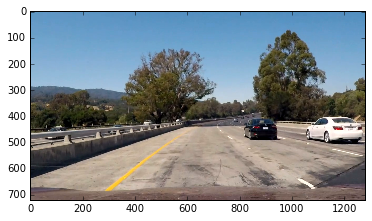

In [81]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML

bboxes_list = []

video = VideoFileClip("project_video.mp4").subclip(25,40)
project_clip = video.fl_image(process_image) #NOTE: this function expects color images!!
video_output = "output_36_40.mp4"
%time project_clip.write_videofile(video_output, audio=False)

print("Bounding boxes: ", bboxes_list)

In [22]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(video_output))